In [4]:
import cv2

cap = cv2.VideoCapture("C:\\Users\\barat\\Downloads\\video.mp4" )
out = cv2.VideoWriter("C:\\Users\\barat\\Downloads\\output2_car_movement.mp4", cv2.VideoWriter_fourcc(*'mp4v'), int(cap.get(5)), (int(cap.get(3)), int(cap.get(4))), False)
fgbg = cv2.createBackgroundSubtractorMOG2()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret: break
    out.write(cv2.threshold(fgbg.apply(frame), 1, 255, cv2.THRESH_BINARY)[1])

cap.release()
out.release()

In [5]:
import numpy as np

cap = cv2.VideoCapture("C:\\Users\\barat\\Downloads\\video.mp4" )
out = cv2.VideoWriter("C:\\Users\\barat\\Downloads\\output2_car_movement.mp4", cv2.VideoWriter_fourcc(*'mp4v'), int(cap.get(5)), (int(cap.get(3)), int(cap.get(4))), False)
background = None
alpha = 0.1  # Learning rate

while cap.isOpened():
    ret, frame = cap.read()
    if not ret: break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    if background is None:
        background = gray.astype(float)
    background = (1 - alpha) * background + alpha * gray
    fgmask = cv2.threshold(cv2.absdiff(gray, background.astype(np.uint8)), 30, 255, cv2.THRESH_BINARY)[1]
    out.write(fgmask)

cap.release()
out.release()

Scene change detected at frame 1


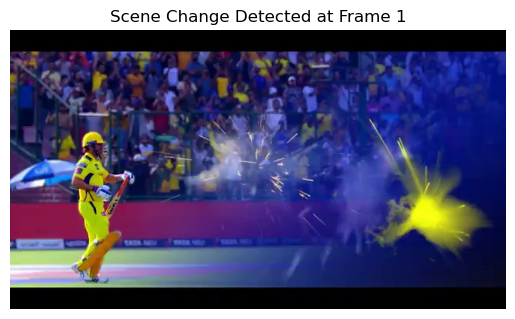

Scene change detected at frame 25


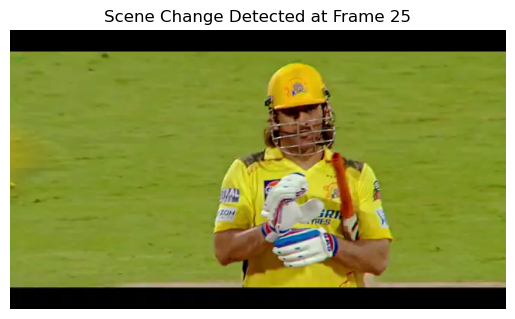

Scene change detected at frame 47


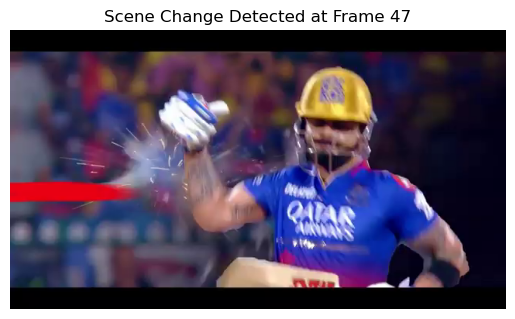

Scene change detected at frame 254


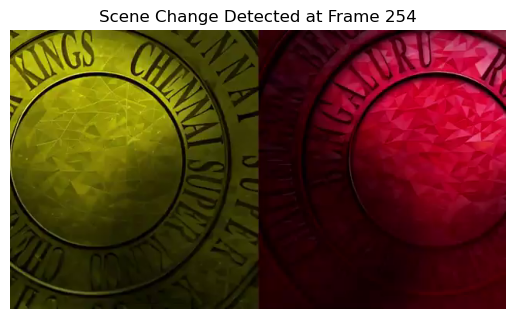

Scene change detected at frame 346


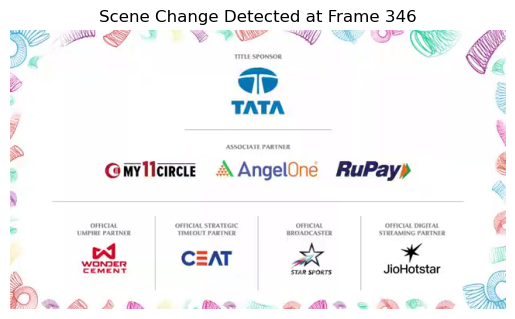

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load video and initialize background subtractor
cap = cv2.VideoCapture("C:\\Users\\barat\\Downloads\\videoplayback.mp4")
fgbg = cv2.createBackgroundSubtractorMOG2()
prev_change = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Apply background subtraction
    fgmask = fgbg.apply(frame)

    # Calculate change ratio
    change_ratio = np.sum(fgmask) / (fgmask.size * 255)

    # Check for scene change
    if abs(change_ratio - prev_change) > 0.4:  # Threshold for scene change
        print(f"Scene change detected at frame {int(cap.get(1))}")
        
        # Convert BGR to RGB for displaying with plt
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Plot the frame where scene change is detected
        plt.imshow(frame_rgb)
        plt.title(f"Scene Change Detected at Frame {int(cap.get(1))}")
        plt.axis('off')  # Hide axis for better visualization
        plt.show()


    prev_change = change_ratio

cap.release()
